# Introduction
We will be exploring the correlation between pokemon popularity compared to their characteristics.

The characteristics we will be comparing are
- Shape
- Color
- Generation Introduced
- Legendary/Mythical
- Form Switchable

In [108]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
cwd = os.getcwd()
print(cwd)

c:\Users\drago\OneDrive\Documents\Projects\Pokemon-Popularity


In [109]:
#importing data from https://www.kaggle.com/datasets/kylekohnen/complete-pokemon-data-set
stats = pd.read_csv(cwd + '/data/complete-pokemon-set.csv')
stats

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,Glastrier,896,Chilling Neigh,Ice,100,145,130,65,110,30,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1114,Spectrier,897,Grim Neigh,Ghost,100,65,60,145,80,130,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1115,Calyrex,898,Unnerve,Psychic~Grass,100,80,80,80,80,80,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1116,Calyrex Ice Rider,898,As One,Psychic~Ice,100,165,150,85,130,50,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [110]:
#Data pulled from survey https://www.reddit.com/r/pokemon/comments/c0w4s0/favourite_pok%C3%A9mon_survey_results/
popular_data = pd.read_csv(cwd + '/data/Favourite_Pokemon_responses-Results.csv')
popular_data

,Results in full,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Select a Pokémon here to see how many votes it got,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Number of pokemon by number of votes,Unnamed: 18,Unnamed: 19,Unnamed: 20,By type,Psychic,Unnamed: 23,By Gen,5
0,Bulbasaur,710.0,Grass Poison,1.0,Bulbasaur,NaN,NaN,Fletchling,6,NaN,...,NaN,Pokemon,Votes,%,NaN,Pokemon,Votes,NaN,Pokemon,Votes
1,Ivysaur,83.0,Grass Poison,1.0,Bulbasaur,NaN,NaN,NaN,NaN,NaN,...,NaN,4,0,0.49%,NaN,Gardevoir,585,NaN,Volcarona,290
2,Venusaur,127.0,Grass Poison,1.0,Bulbasaur,NaN,NaN,NaN,NaN,NaN,...,NaN,8,1,0.99%,NaN,Metagross,395,NaN,Chandelure,222
3,Charmander,374.0,Fire,1.0,Charmander,NaN,NaN,Number of valid votes:,52725,NaN,...,NaN,28,2,3.46%,NaN,Espeon,384,NaN,Hydreigon,166
4,Charmeleon,70.0,Fire,1.0,Charmander,NaN,NaN,Average per pokémon,65,NaN,...,NaN,24,3,2.97%,NaN,Alakazam,376,NaN,Zoroark,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1095,0.00%,NaN,NaN,NaN,NaN,NaN,NaN
1097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1096,0.00%,NaN,NaN,NaN,NaN,NaN,NaN
1098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1097,0.00%,NaN,NaN,NaN,NaN,NaN,NaN
1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1098,0.00%,NaN,NaN,NaN,NaN,NaN,NaN


# Clean Data, merge, and calculate new values to explore

## Clean

### Popular vote
This data set has many columns that we do not need that will need to be dropped

In [111]:
# Dropping unnessecary data
pop = popular_data.loc[0:808, ['Results in full', 'Unnamed: 1']]

pop

,Results in full,Unnamed: 1
0,Bulbasaur,710.0
1,Ivysaur,83.0
2,Venusaur,127.0
3,Charmander,374.0
4,Charmeleon,70.0
...,...,...
804,Stakataka,13.0
805,Blacephalon,8.0
806,Zeraora,17.0
807,Meltan,3.0


In [112]:
# Renaming columns to make lookup and merge easier
pop = pop.rename(columns={'Results in full':'name', 'Unnamed: 1':'votes'})
pop

,name,votes
0,Bulbasaur,710.0
1,Ivysaur,83.0
2,Venusaur,127.0
3,Charmander,374.0
4,Charmeleon,70.0
...,...,...
804,Stakataka,13.0
805,Blacephalon,8.0
806,Zeraora,17.0
807,Meltan,3.0


In [113]:
# Reseting index and using that to make the national pokedex (nat_dex) number that will be used later to form a merge
pop = pop.reset_index()
pop = pop.rename(columns={'index':'nat_dex'})
pop['nat_dex'] = pop.index + 1
pop

,nat_dex,name,votes
0,1,Bulbasaur,710.0
1,2,Ivysaur,83.0
2,3,Venusaur,127.0
3,4,Charmander,374.0
4,5,Charmeleon,70.0
...,...,...,...
804,805,Stakataka,13.0
805,806,Blacephalon,8.0
806,807,Zeraora,17.0
807,808,Meltan,3.0


### Stats
This data set has data that will not be nessisary for our exploration, some columns that will be easer if we split the data into two columns

In [114]:
# Getting a list of columns to see what we should drop and split to make managing the dataframe easier
stats.columns

Index(['name', 'pokedex_number', 'abilities', 'typing', 'hp', 'attack',
       'defense', 'special_attack', 'special_defense', 'speed', 'height',
       'weight', 'genus', 'gen_introduced', 'female_rate', 'genderless',
       'baby_pokemon', 'legendary', 'mythical', 'is_default',
       'forms_switchable', 'base_experience', 'capture_rate', 'egg_groups',
       'egg_cycles', 'base_happiness', 'can_evolve', 'evolves_from',
       'primary_color', 'shape', 'number_pokemon_with_typing',
       'normal_attack_effectiveness', 'fire_attack_effectiveness',
       'water_attack_effectiveness', 'electric_attack_effectiveness',
       'grass_attack_effectiveness', 'ice_attack_effectiveness',
       'fighting_attack_effectiveness', 'poison_attack_effectiveness',
       'ground_attack_effectiveness', 'fly_attack_effectiveness',
       'psychic_attack_effectiveness', 'bug_attack_effectiveness',
       'rock_attack_effectiveness', 'ghost_attack_effectiveness',
       'dragon_attack_effectiveness', '

In [115]:
# Dropping all columns that have '_attack_effectiveness' at the end of their column name
stats = stats.loc[:,~stats.columns.str.endswith('_attack_effectiveness')]
# Dropping other columns that will be unused
columns_to_drop = ['abilities', 'typing', 'height', 'weight','female_rate', 'genderless',
                   'baby_pokemon', 'genus', 'base_experience', 'capture_rate', 'egg_groups',
                   'egg_cycles', 'base_happiness', 'can_evolve', 'evolves_from', 'number_pokemon_with_typing']
stats = stats.drop(columns=columns_to_drop)
stats.head()

,name,pokedex_number,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,mythical,is_default,forms_switchable,primary_color,shape
0,Bulbasaur,1,45,49,49,65,65,45,1,False,False,True,False,Green,Quadruped
1,Ivysaur,2,60,62,63,80,80,60,1,False,False,True,False,Green,Quadruped
2,Venusaur,3,80,82,83,100,100,80,1,False,False,True,True,Green,Quadruped
3,Venusaur Gmax,3,80,82,83,100,100,80,1,False,False,False,True,Green,Quadruped
4,Venusaur Mega,3,80,100,123,122,120,80,1,False,False,False,True,Green,Quadruped


In [116]:
# Renaming pokedex_number to nat_dex to be used as key for merge later
stats = stats.rename(columns={'pokedex_number': 'nat_dex'})
stats.columns

Index(['name', 'nat_dex', 'hp', 'attack', 'defense', 'special_attack',
       'special_defense', 'speed', 'gen_introduced', 'legendary', 'mythical',
       'is_default', 'forms_switchable', 'primary_color', 'shape'],
      dtype='object')

In [117]:
# Dropping data for pokemon that did not exist during survey
stats = stats[stats.nat_dex < 810]
stats.tail()

,name,nat_dex,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,mythical,is_default,forms_switchable,primary_color,shape
995,Blacephalon,806,53,127,53,151,79,107,7,False,False,True,False,White,Humanoid
996,Zeraora,807,88,112,75,102,80,143,7,False,True,True,False,Yellow,Humanoid
997,Meltan,808,46,65,65,55,35,34,7,False,True,True,False,Gray,Ball
998,Melmetal,809,135,143,143,80,65,34,7,False,True,True,False,Gray,Humanoid
999,Melmetal Gmax,809,135,143,143,80,65,34,7,False,True,False,False,Gray,Humanoid


In [118]:
# reogranizing columns so first column is the nat_dex number
stats.insert(0, 'nat_dex', stats.pop('nat_dex'))
stats.head()


,nat_dex,name,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,mythical,is_default,forms_switchable,primary_color,shape
0,1,Bulbasaur,45,49,49,65,65,45,1,False,False,True,False,Green,Quadruped
1,2,Ivysaur,60,62,63,80,80,60,1,False,False,True,False,Green,Quadruped
2,3,Venusaur,80,82,83,100,100,80,1,False,False,True,True,Green,Quadruped
3,3,Venusaur Gmax,80,82,83,100,100,80,1,False,False,False,True,Green,Quadruped
4,3,Venusaur Mega,80,100,123,122,120,80,1,False,False,False,True,Green,Quadruped


In [119]:
# dropping rows for alternate forms of each pokemon
def_stats = stats[stats['is_default'] ==True]
def_stats = def_stats.reset_index(drop=True)
# making sure that nat_dex should be 1 more that index
def_stats.tail()

,nat_dex,name,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,mythical,is_default,forms_switchable,primary_color,shape
804,805,Stakataka,61,131,211,53,101,13,7,False,False,True,False,Gray,Quadruped
805,806,Blacephalon,53,127,53,151,79,107,7,False,False,True,False,White,Humanoid
806,807,Zeraora,88,112,75,102,80,143,7,False,True,True,False,Yellow,Humanoid
807,808,Meltan,46,65,65,55,35,34,7,False,True,True,False,Gray,Ball
808,809,Melmetal,135,143,143,80,65,34,7,False,True,True,False,Gray,Humanoid


In [120]:
# Merging the legendary and mythical since both are rare
def_stats['legendary_mythical'] = def_stats['legendary'] | def_stats['mythical']
def_stats.drop(['legendary', 'mythical'], axis=1, inplace=True)

def_stats.tail()

,nat_dex,name,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,is_default,forms_switchable,primary_color,shape,legendary_mythical
804,805,Stakataka,61,131,211,53,101,13,7,True,False,Gray,Quadruped,False
805,806,Blacephalon,53,127,53,151,79,107,7,True,False,White,Humanoid,False
806,807,Zeraora,88,112,75,102,80,143,7,True,False,Yellow,Humanoid,True
807,808,Meltan,46,65,65,55,35,34,7,True,False,Gray,Ball,True
808,809,Melmetal,135,143,143,80,65,34,7,True,False,Gray,Humanoid,True


Some of the names used in shape are unusal and don't match what the community has agreed upon for the name of each shape. We are going to change the values to be more accurate in the describtion of the shape.

In [121]:
# Replacing multiple values in shape column 
replace_dict = {'Ball': 'Head',
                'Fish': 'Fins',
                'Armor': 'Insectoid',
                'Bug-Wings': 'Multi_Wing',
                'Heads': 'Multi_Bodies',
                'Blob': 'Head_Base',
                'Upright': 'Bipedal_Tail',
                'Humanoid': 'Bipedal_Tailless',
                'Squiggle': 'Serpentine'
                }
def_stats['shape'] = def_stats['shape'].replace(replace_dict)
def_stats.head()

,nat_dex,name,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,is_default,forms_switchable,primary_color,shape,legendary_mythical
0,1,Bulbasaur,45,49,49,65,65,45,1,True,False,Green,Quadruped,False
1,2,Ivysaur,60,62,63,80,80,60,1,True,False,Green,Quadruped,False
2,3,Venusaur,80,82,83,100,100,80,1,True,True,Green,Quadruped,False
3,4,Charmander,39,52,43,60,50,65,1,True,False,Red,Bipedal_Tail,False
4,5,Charmeleon,58,64,58,80,65,80,1,True,False,Red,Bipedal_Tail,False


# Merge
Merging dataframes based on nat_dex

In [122]:
poke = def_stats.merge(pop, how='left', on='nat_dex')
poke['votes'] = poke['votes'].astype('int64')
poke.head()

,nat_dex,name_x,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,is_default,forms_switchable,primary_color,shape,legendary_mythical,name_y,votes
0,1,Bulbasaur,45,49,49,65,65,45,1,True,False,Green,Quadruped,False,Bulbasaur,710
1,2,Ivysaur,60,62,63,80,80,60,1,True,False,Green,Quadruped,False,Ivysaur,83
2,3,Venusaur,80,82,83,100,100,80,1,True,True,Green,Quadruped,False,Venusaur,127
3,4,Charmander,39,52,43,60,50,65,1,True,False,Red,Bipedal_Tail,False,Charmander,374
4,5,Charmeleon,58,64,58,80,65,80,1,True,False,Red,Bipedal_Tail,False,Charmeleon,70


In [123]:
# making sure name that don't matches are just due to spelling or forms
poke.loc[(poke['name_x'] != poke['name_y'])]

,nat_dex,name_x,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,is_default,forms_switchable,primary_color,shape,legendary_mythical,name_y,votes
28,29,Nidoran F,55,47,52,40,40,41,1,True,False,Blue,Quadruped,False,Nidoran-F,7
31,32,Nidoran M,46,57,40,40,40,50,1,True,False,Purple,Quadruped,False,Nidoran-M,18
121,122,Mr Mime,40,45,65,100,120,90,1,True,False,Pink,Bipedal_Tailless,False,Mr-Mime,70
249,250,Ho Oh,106,130,90,110,154,90,2,True,False,Red,Wings,True,Ho-Oh,49
385,386,Deoxys Normal,50,150,50,150,50,150,3,True,True,Red,Bipedal_Tailless,True,Deoxys,75
412,413,Wormadam Plant,60,59,85,79,105,36,4,True,False,Green,Head_Base,False,Wormadam,4
438,439,Mime Jr,20,25,45,70,90,60,4,True,False,Pink,Bipedal_Tailless,False,Mime-Jr,9
473,474,Porygon Z,85,80,70,135,75,90,4,True,False,Red,Arms,False,Porygon-Z,148
486,487,Giratina Altered,150,100,120,100,120,90,4,True,True,Black,Tentacles,True,Giratina,157
491,492,Shaymin Land,100,100,100,100,100,100,4,True,True,Green,Quadruped,True,Shaymin,112


In [124]:
# dropping the redundent name column and renaming 'name'
poke = poke.drop(columns='name_x')
poke = poke.rename(columns={'name_y':'name'})
poke.head(9)

,nat_dex,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,is_default,forms_switchable,primary_color,shape,legendary_mythical,name,votes
0,1,45,49,49,65,65,45,1,True,False,Green,Quadruped,False,Bulbasaur,710
1,2,60,62,63,80,80,60,1,True,False,Green,Quadruped,False,Ivysaur,83
2,3,80,82,83,100,100,80,1,True,True,Green,Quadruped,False,Venusaur,127
3,4,39,52,43,60,50,65,1,True,False,Red,Bipedal_Tail,False,Charmander,374
4,5,58,64,58,80,65,80,1,True,False,Red,Bipedal_Tail,False,Charmeleon,70
5,6,78,84,78,109,85,100,1,True,True,Red,Bipedal_Tail,False,Charizard,1107
6,7,44,48,65,50,64,43,1,True,False,Blue,Bipedal_Tail,False,Squirtle,523
7,8,59,63,80,65,80,58,1,True,False,Blue,Bipedal_Tail,False,Wartortle,133
8,9,79,83,100,85,105,78,1,True,True,Blue,Bipedal_Tail,False,Blastoise,410


In [125]:
def column_mean(dataframe, column_names):
    """
    Pass thru dataframe and column names to then figure the mean of the votes by that column name and add a new column with that value
    """
    # Creating a dataframe to do our mean calculations on
    for column_name in column_names:
        # 'is_default' is a boolian that is always true so that will be good to use for a count
        mean_df = dataframe.groupby(column_name).agg({'votes': 'sum', 'is_default': 'count'}).reset_index()

        mean_df[column_name + '_mean'] = mean_df['votes'] / mean_df['is_default']
        # Merging a new column that will have the mean calculated if there is not one there.
        if column_name + '_mean' not in dataframe.columns:
            dataframe = pd.merge(dataframe, mean_df[[column_name, column_name + '_mean']], on=column_name, how='right')
        
    # Resorting dataframe by nat_dex and reseting index
    dataframe = dataframe.sort_values(by='nat_dex', ascending=True).reset_index(drop=True)
    return dataframe

In [126]:
# Making 3 new columns that will give us the mean values by characteristics
columns_to_mean = ['primary_color', 'shape', 'gen_introduced']
poke = column_mean(poke, columns_to_mean)
poke.head()

,nat_dex,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,is_default,forms_switchable,primary_color,shape,legendary_mythical,name,votes,primary_color_mean,shape_mean,gen_introduced_mean
0,1,45,49,49,65,65,45,1,True,False,Green,Quadruped,False,Bulbasaur,710,76.678161,88.158940,121.119205
1,2,60,62,63,80,80,60,1,True,False,Green,Quadruped,False,Ivysaur,83,76.678161,88.158940,121.119205
2,3,80,82,83,100,100,80,1,True,True,Green,Quadruped,False,Venusaur,127,76.678161,88.158940,121.119205
3,4,39,52,43,60,50,65,1,True,False,Red,Bipedal_Tail,False,Charmander,374,63.121951,100.261905,121.119205
4,5,58,64,58,80,65,80,1,True,False,Red,Bipedal_Tail,False,Charmeleon,70,63.121951,100.261905,121.119205


In [127]:
# Checking to see how many non-null there is for each column
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nat_dex              809 non-null    int64  
 1   hp                   809 non-null    int64  
 2   attack               809 non-null    int64  
 3   defense              809 non-null    int64  
 4   special_attack       809 non-null    int64  
 5   special_defense      809 non-null    int64  
 6   speed                809 non-null    int64  
 7   gen_introduced       809 non-null    int64  
 8   is_default           809 non-null    bool   
 9   forms_switchable     809 non-null    bool   
 10  primary_color        809 non-null    object 
 11  shape                809 non-null    object 
 12  legendary_mythical   809 non-null    bool   
 13  name                 809 non-null    object 
 14  votes                809 non-null    int64  
 15  primary_color_mean   809 non-null    flo

# Data Exploration and Visualization

Now we get to dig into the data. First we will look at how the votes are spread out.

In [128]:
print('The max number of votes is:', poke['votes'].max())
print('The median number of votes is:', poke['votes'].median())
print('The mean number of votes is:', poke['votes'].mean())
print('The unique values for the number of votes is:', len(pd.unique(poke['votes'])))

The max number of votes is: 1107
The median number of votes is: 23.0
The mean number of votes is: 65.17305315203956
The unique values for the number of votes is: 207


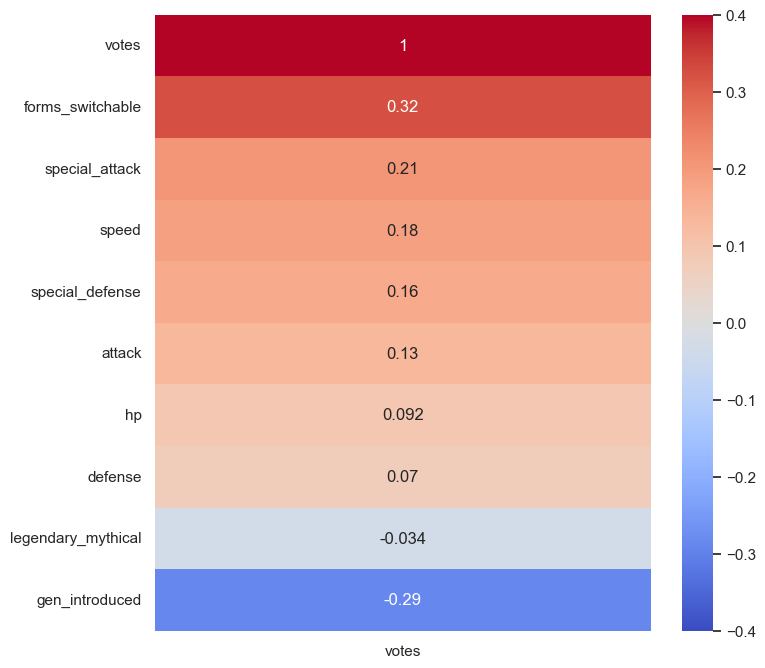

In [129]:
columns_to_drop = ['nat_dex', 'name', 'shape',
                   'is_default', 'primary_color',
                   'gen_introduced_mean', 'shape_mean',
                   'primary_color_mean']
heat = poke.drop(columns=columns_to_drop)

# Heatmap to show correlation between votes and other features
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(heat.corr()[['votes']].sort_values(by='votes', ascending=False),
            annot=True, cmap='coolwarm', vmax=.4, vmin=-.4)

# Makes plots directory if it doesn't exist and then save the plot as a png file
if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig('plots/poke_heatmap.png')

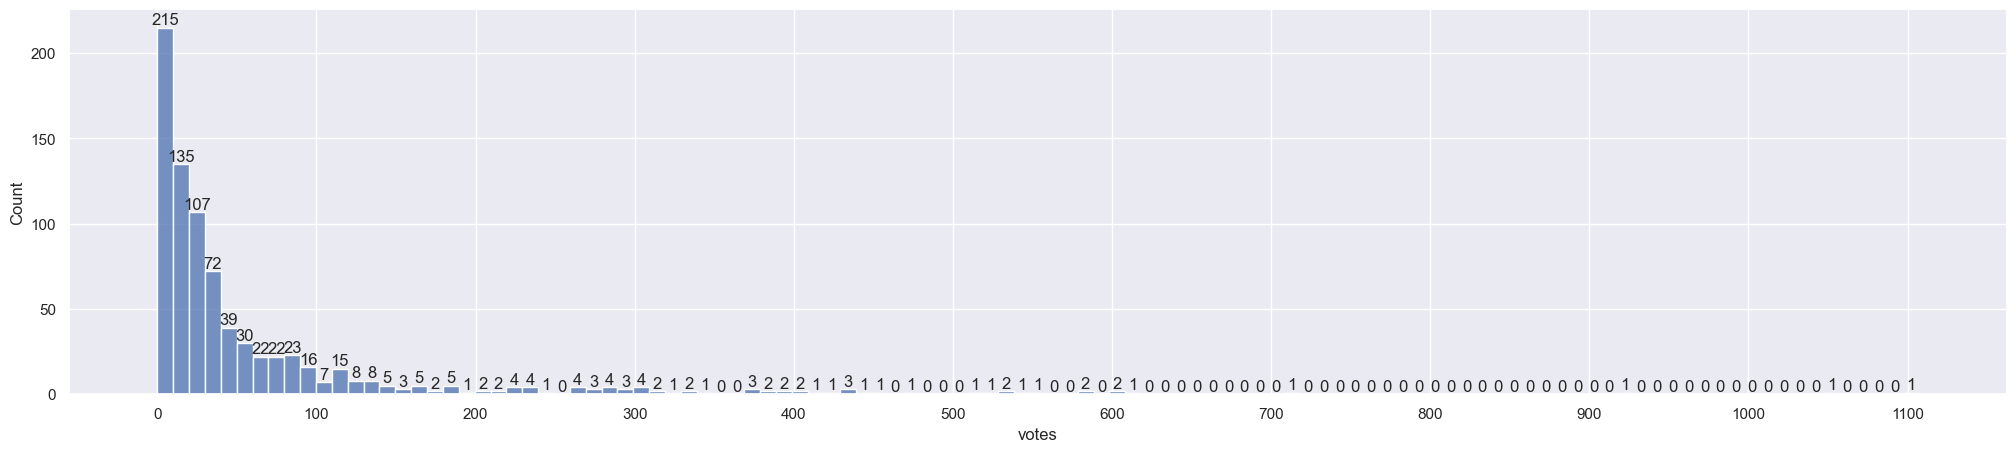

In [130]:
# Using a histogram to show the spread of votes
sns.set(style='darkgrid', rc={'figure.figsize':(25, 5)})

hist_votes = sns.histplot(data=poke, x='votes', binwidth=10)

hist_votes.bar_label(hist_votes.containers[0])
hist_votes.set_xticks(np.arange(0,1101,100))

# Makes plots directory if it doesn't exist and then save the plot as a png file
if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig('plots/poke_histplot.png')
plt.show(hist_votes)

As we can see from the histogram, the outliers skew our data. We may benefit from breaking our data down into small groups. Lets show this same distribution of data but on a logorithmic scale. This can help us see how the spread of the data is.

In [131]:
# Since we are using a logorithmic scale, 0 does not appear, so we are changing the votes that are equal to 0 to .4
# This should not skew our data by much, and I would like to preserve the zero votes
poke_log = poke
poke_log = poke_log.astype({'votes': float})
poke_log.loc[poke_log['votes'] == 0, 'votes'] = .4
poke_log['votes'].min()

0.4

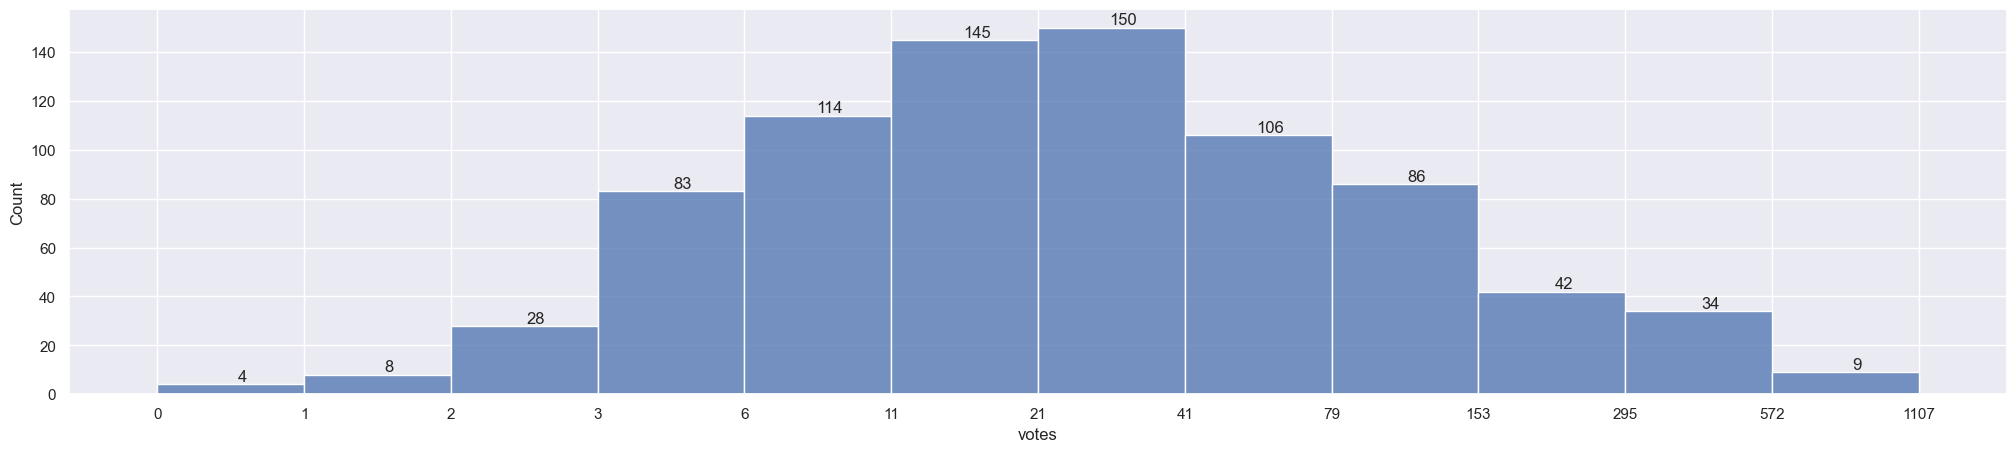

In [132]:
sns.set(style='darkgrid', rc={'figure.figsize':(25, 5)})

hist_log_votes = sns.histplot(data=poke_log, x='votes', bins=12, log_scale=True)

min_val = poke_log['votes'].min()
max_val = poke_log['votes'].max()
# This will figure out our bin edges since we are doing a logorithmic scale
# We have to do 13 divisions because of the number of bin edges is 1 more than the number of bins
bin_edges = np.logspace(np.log10(min_val), np.log10(max_val), 13)
bin_edges = bin_edges.tolist()

# This will set the tick marks to line up with our bins.
hist_log_votes.set_xticks(bin_edges)
# This will set our tick labels so that the number on the left of the bin will be the starting of that bin.
# Example is the 4th bin has the total number of pokemon that recived 3, 4, or 5 votes.
ticks_label = [round(round(f,1)) for f in bin_edges]
hist_log_votes.set_xticklabels(ticks_label)

hist_log_votes.bar_label(hist_log_votes.containers[0])

# Makes plots directory if it doesn't exist and then save the plot as a png file
if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig('plots/poke_log_histplot.png')
plt.show(hist_log_votes)

In [133]:
def vote_count(dataframe, vote_lookup):
    # Filter rows based on the specified vote count
    filtered_data = dataframe[dataframe['votes'] == vote_lookup]
    
    # Get the number of rows with the specified vote count and return it
    return len(filtered_data)



def filter_df(dataframe, column_name, value, greater=True):
    """
    Filter a dataframe to give back all values that are greater than or equal to in a specific column.
    If greater=False than it gives all values that are lesser than or equal to in the specific column.
    """
    if greater == True:
        filter_dataframe = dataframe[dataframe[column_name] >= value]
    else:
        filter_dataframe = dataframe[dataframe[column_name] <= value]
    
    filter_dataframe.reset_index(drop=True, inplace=True)
    
    return filter_dataframe



def sort_df(dataframe, column_name, ascending=False):
    """"
    Sort function to sort df by a column 
    """
    sorted_df = dataframe.sort_values(by=column_name, ascending=ascending).reset_index(drop=True)
    return sorted_df

In [134]:
# Lets find out what is the highest voted pokemon by shape
max_votes_shape = poke.groupby('shape')['votes'].idxmax()
results_shape = poke.loc[max_votes_shape]
results_shape

,nat_dex,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,is_default,forms_switchable,primary_color,shape,legendary_mythical,name,votes,primary_color_mean,shape_mean,gen_introduced_mean
92,93,45,50,45,115,55,95,1,True,False,Purple,Arms,False,Haunter,301,65.253333,38.066667,121.119205
5,6,78,84,78,109,85,100,1,True,True,Red,Bipedal_Tail,False,Charizard,1107,63.121951,100.261905,121.119205
281,282,68,65,65,125,115,80,3,True,True,White,Bipedal_Tailless,False,Gardevoir,585,57.269841,56.392000,70.140741
130,131,130,85,80,85,95,60,1,True,False,Blue,Fins,False,Lapras,233,73.137931,31.361111,121.119205
131,132,48,48,48,48,48,48,1,True,False,Purple,Head,False,Ditto,184,65.253333,25.184211,121.119205
680,681,60,50,140,50,140,60,6,True,True,Brown,Head_Base,False,Aegislash,168,62.154472,36.878788,29.916667
212,213,20,10,230,10,230,5,2,True,False,Yellow,Insectoid,False,Shuckle,176,93.235294,28.026316,91.150000
42,43,45,50,55,75,65,30,1,True,False,Blue,Legs,False,Oddish,127,73.137931,39.684211,121.119205
375,376,80,135,130,95,90,70,3,True,True,Blue,Multi_Bodies,False,Metagross,395,73.137931,43.866667,70.140741
211,212,70,130,100,55,80,65,2,True,True,Red,Multi_Wing,False,Scizor,424,63.121951,91.210526,91.150000


In [135]:
# Lets find out what is the highest voted pokemon by primary_color
max_votes_color = poke.groupby('primary_color')['votes'].idxmax()
results_color = poke.loc[max_votes_color]
results_color

,nat_dex,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,is_default,forms_switchable,primary_color,shape,legendary_mythical,name,votes,primary_color_mean,shape_mean,gen_introduced_mean
196,197,95,65,110,60,130,65,2,True,False,Black,Quadruped,False,Umbreon,607,79.350000,88.158940,91.150000
447,448,70,110,70,115,70,90,4,True,True,Blue,Bipedal_Tail,False,Lucario,604,73.137931,100.261905,70.383178
58,59,90,110,80,100,80,95,1,True,False,Brown,Quadruped,False,Arcanine,923,62.154472,88.158940,121.119205
305,306,70,110,180,60,60,50,3,True,True,Gray,Bipedal_Tail,False,Aggron,313,32.050633,100.261905,70.140741
0,1,45,49,49,65,65,45,1,True,False,Green,Quadruped,False,Bulbasaur,710,76.678161,88.158940,121.119205
699,700,95,65,65,110,130,60,6,True,False,Pink,Quadruped,False,Sylveon,282,44.255319,88.158940,29.916667
93,94,60,65,60,130,75,110,1,True,True,Purple,Bipedal_Tail,False,Gengar,1056,65.253333,100.261905,121.119205
5,6,78,84,78,109,85,100,1,True,True,Red,Bipedal_Tail,False,Charizard,1107,63.121951,100.261905,121.119205
281,282,68,65,65,125,115,80,3,True,True,White,Bipedal_Tailless,False,Gardevoir,585,57.269841,56.392000,70.140741
156,157,78,84,78,109,85,100,2,True,False,Yellow,Quadruped,False,Typhlosion,534,93.235294,88.158940,91.150000


In [136]:
# Lets find out what is the highest voted pokemon by generation
max_votes_gen = poke.groupby('gen_introduced')['votes'].idxmax()
results_gen = poke.loc[max_votes_gen]
results_gen

,nat_dex,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,is_default,forms_switchable,primary_color,shape,legendary_mythical,name,votes,primary_color_mean,shape_mean,gen_introduced_mean
5,6,78,84,78,109,85,100,1,True,True,Red,Bipedal_Tail,False,Charizard,1107,63.121951,100.261905,121.119205
196,197,95,65,110,60,130,65,2,True,False,Black,Quadruped,False,Umbreon,607,79.350000,88.158940,91.150000
256,257,80,120,70,110,70,80,3,True,True,Red,Bipedal_Tail,False,Blaziken,613,63.121951,100.261905,70.140741
447,448,70,110,70,115,70,90,4,True,True,Blue,Bipedal_Tail,False,Lucario,604,73.137931,100.261905,70.383178
636,637,85,60,65,135,105,100,5,True,False,White,Multi_Wing,False,Volcarona,290,57.269841,91.210526,28.147436
699,700,95,65,65,110,130,60,6,True,False,Pink,Quadruped,False,Sylveon,282,44.255319,88.158940,29.916667
777,778,55,90,80,50,105,96,7,True,False,Yellow,Serpentine,False,Mimikyu,284,93.235294,67.593750,20.181818


In [137]:
# Making some dataframes with pokemon that recived 100 votes or more, and one that has 9 or less
over = 100
under =99
poke_over = filter_df(poke, 'votes', over)
poke_under = filter_df(poke, 'votes', under, greater=False)

print(f'The number of pokemon with {over} or more votes is {len(poke_over)}. This is approximately {round((len(poke_over) / len(poke)) * 100, 1)}% of the sample size.')
print(f'The number of pokemon with {under} or lower votes is {len(poke_under)} This is approximately {round(((len(poke_under)/len(poke))*100),1)}% of the sample size.')

The number of pokemon with 100 or more votes is 128. This is approximately 15.8% of the sample size.
The number of pokemon with 99 or lower votes is 681 This is approximately 84.2% of the sample size.


In [138]:
# Dropping the mean columns so we can recalculate with the new smaller sample sizes
poke_over = poke_over.loc[:,~poke_over.columns.str.endswith('_mean')]
poke_under = poke_under.loc[:,~poke_under.columns.str.endswith('_mean')]
# Adding columns that have the mean value of 'primary_color', 'shape', 'gen_introduced', using the function I made earlier
columns_to_mean = ['primary_color', 'shape', 'gen_introduced']
poke_over = column_mean(poke_over, columns_to_mean)
poke_under = column_mean(poke_under, columns_to_mean)

In [139]:
def df_box(dataframe, showfliers=True):
    """ 
    This function will display three boxplots show the spread of the data basied on primary_color, shape, and gen_introduced
    """
    # Setting our style and figsize
    sns.set(style='darkgrid', rc={'figure.figsize':(20, 20)})

    # Making a subplot
    fig, axes = plt.subplots(nrows=3, ncols=1)
    # This box plot will show the distribution of primary_color of the pokemon
    color_box = sns.boxplot(x='votes', y='primary_color',
                    data=sort_df(dataframe, 'primary_color_mean'),
                    showfliers=showfliers,
                    showmeans=True, meanprops={
                                            'marker':'o',
                                            'markerfacecolor':'white',
                                            'markeredgecolor':'black',
                                            'markersize':'10'
                                            },
                    color='b', ax=axes[0])
    color_box.set_ylabel('color')

    # This box plot will show the ditribution of shape of the pokemon
    shape_box = sns.boxplot(x='votes', y='shape',
                    data=sort_df(dataframe, 'shape_mean'),
                    showfliers=showfliers,
                    showmeans=True, meanprops={
                                            'marker':'o',
                                            'markerfacecolor':'white',
                                            'markeredgecolor':'black',
                                            'markersize':'10'
                                            },
                    color='g', ax=axes[1])
    shape_box.set_ylabel('shape')

    # This box plot with show the distribution of when the pokemon was introduced based on generation
    gen_box = sns.boxplot(x='votes', y='gen_introduced', orient= 'h',
                    data=dataframe,
                    showfliers=showfliers,
                    showmeans=True, meanprops={
                                            'marker':'o',
                                            'markerfacecolor':'white',
                                            'markeredgecolor':'black',
                                            'markersize':'10'
                                            },
                    color='r', ax=axes[2])
    gen_box.set_ylabel('generation')

    plt.tight_layout()
    plt.show()

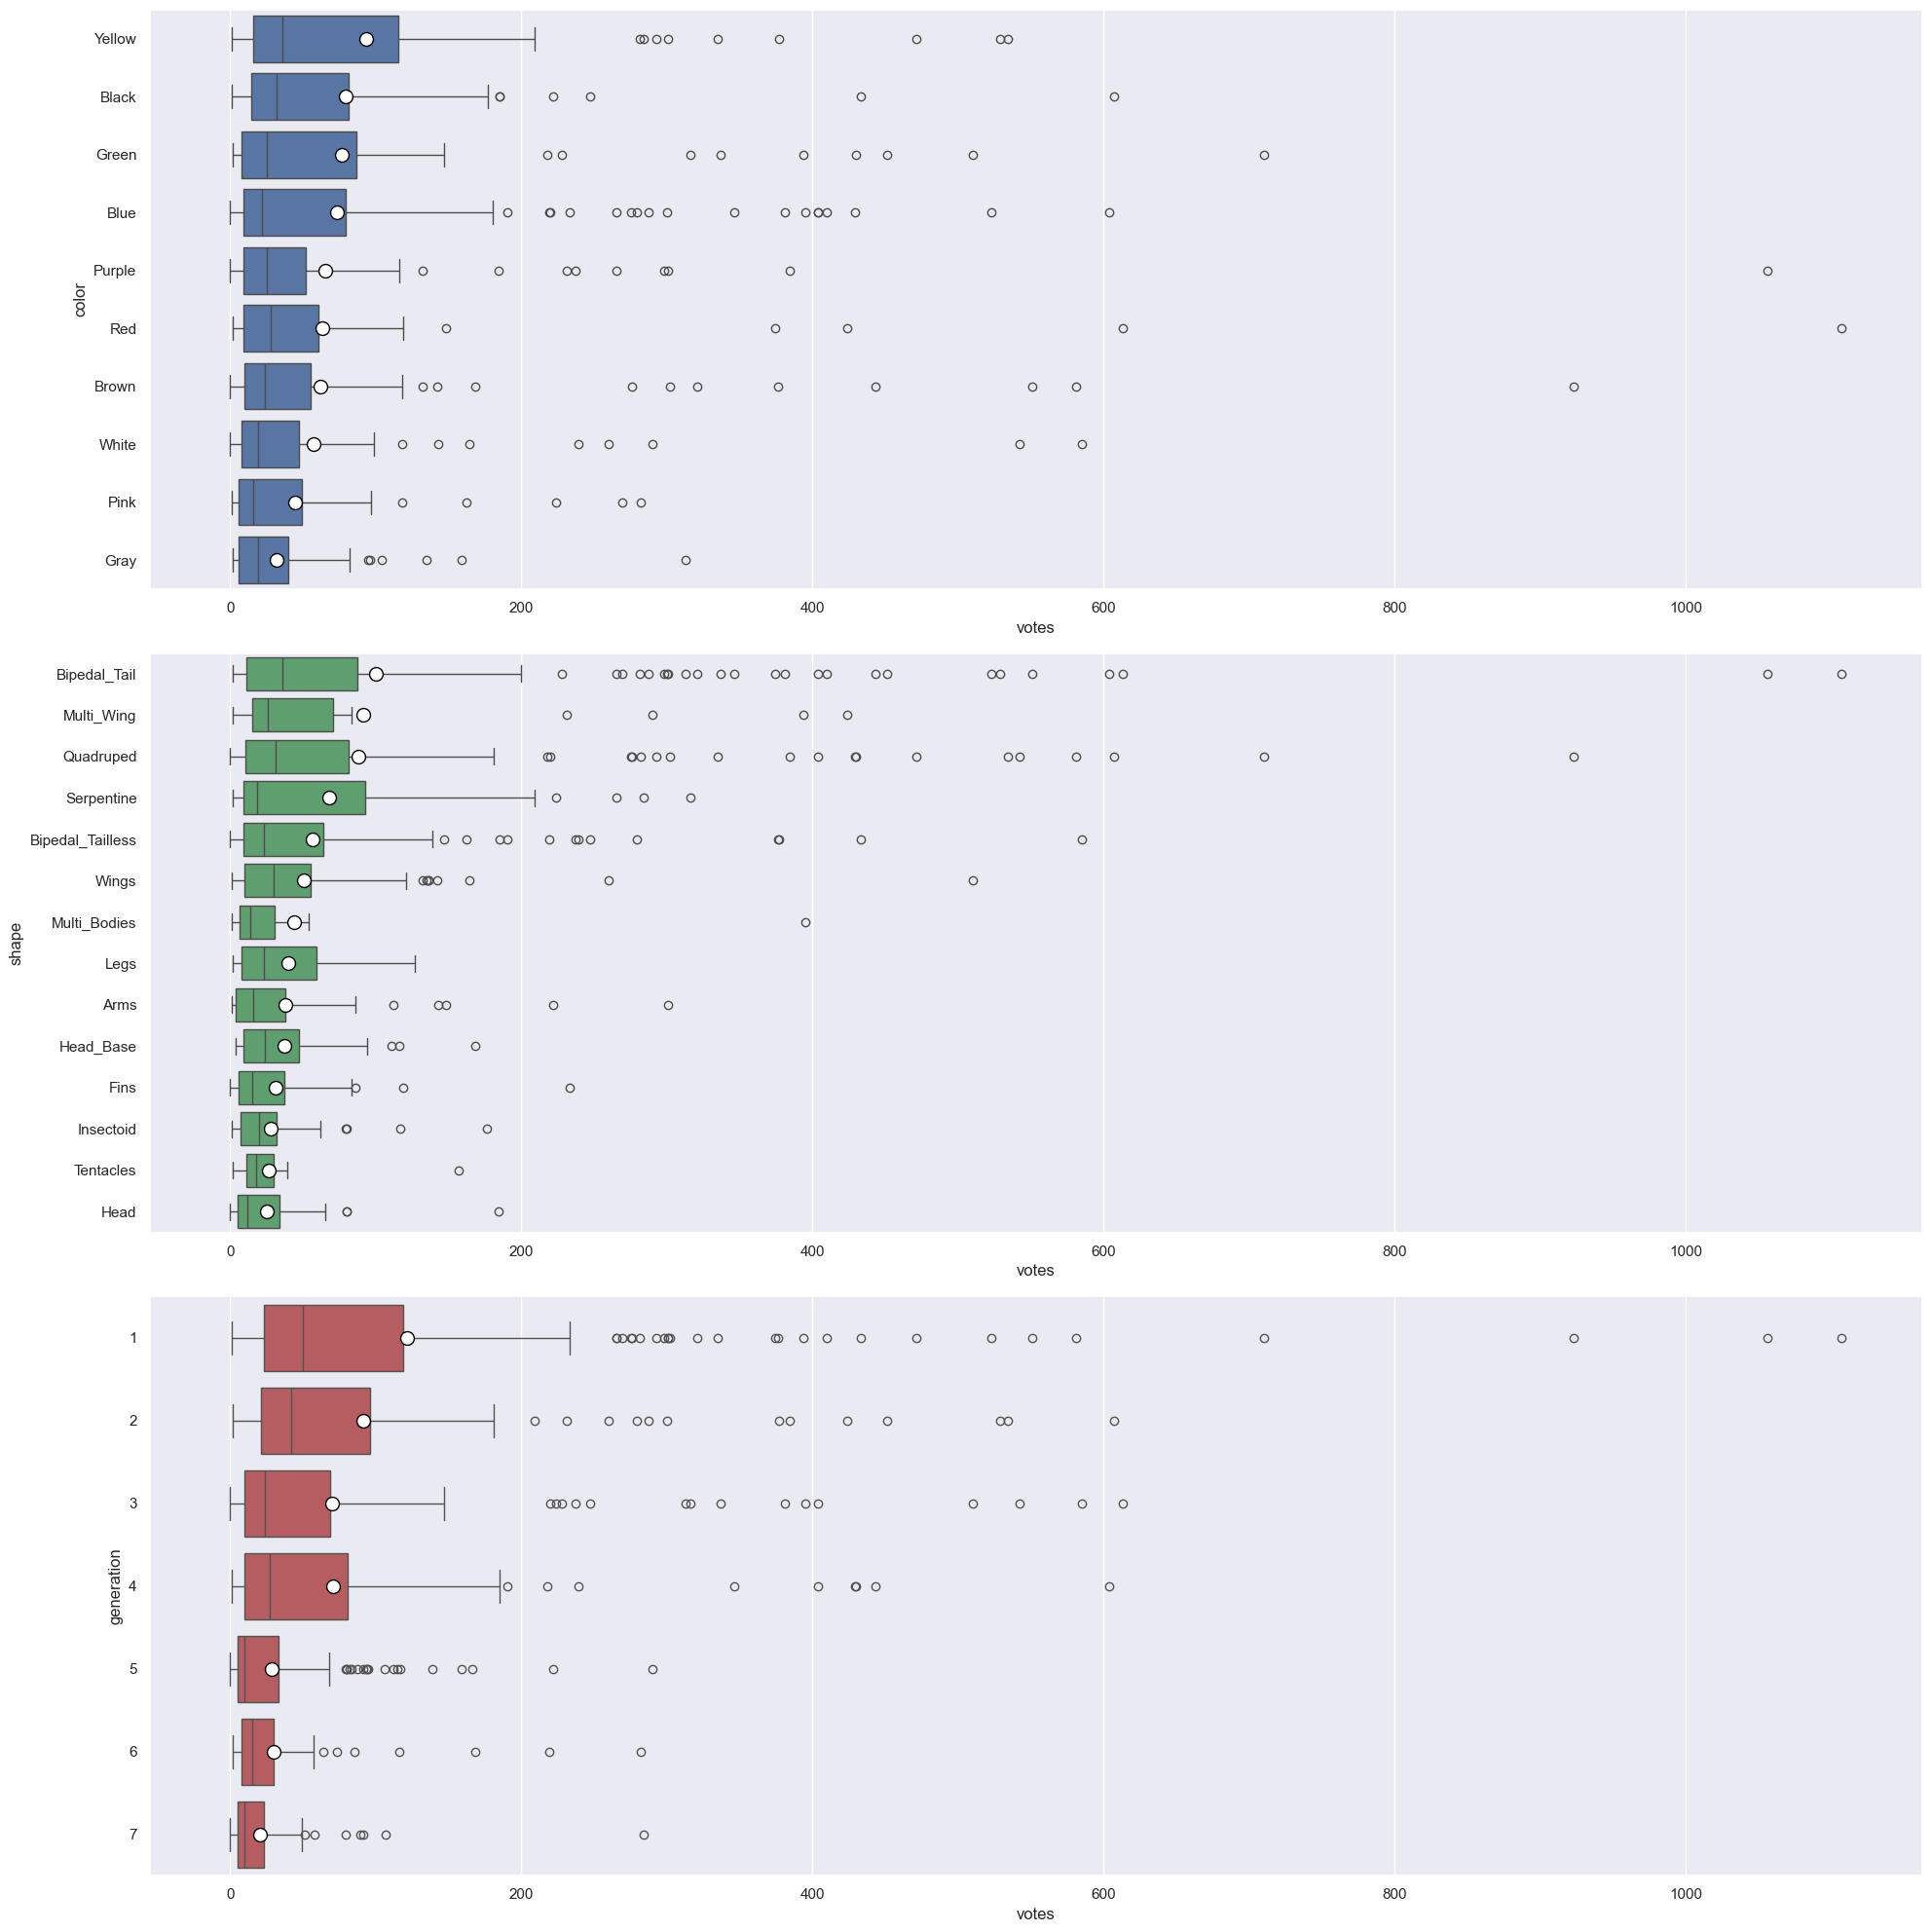

<Figure size 2000x2000 with 0 Axes>

In [140]:
# Three boxplots of the overall spread showing how popular they are by groups.
df_box(poke)

# Makes plots directory if it doesn't exist and then save the plot as a png file
if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig('plots/poke_boxplot.png')

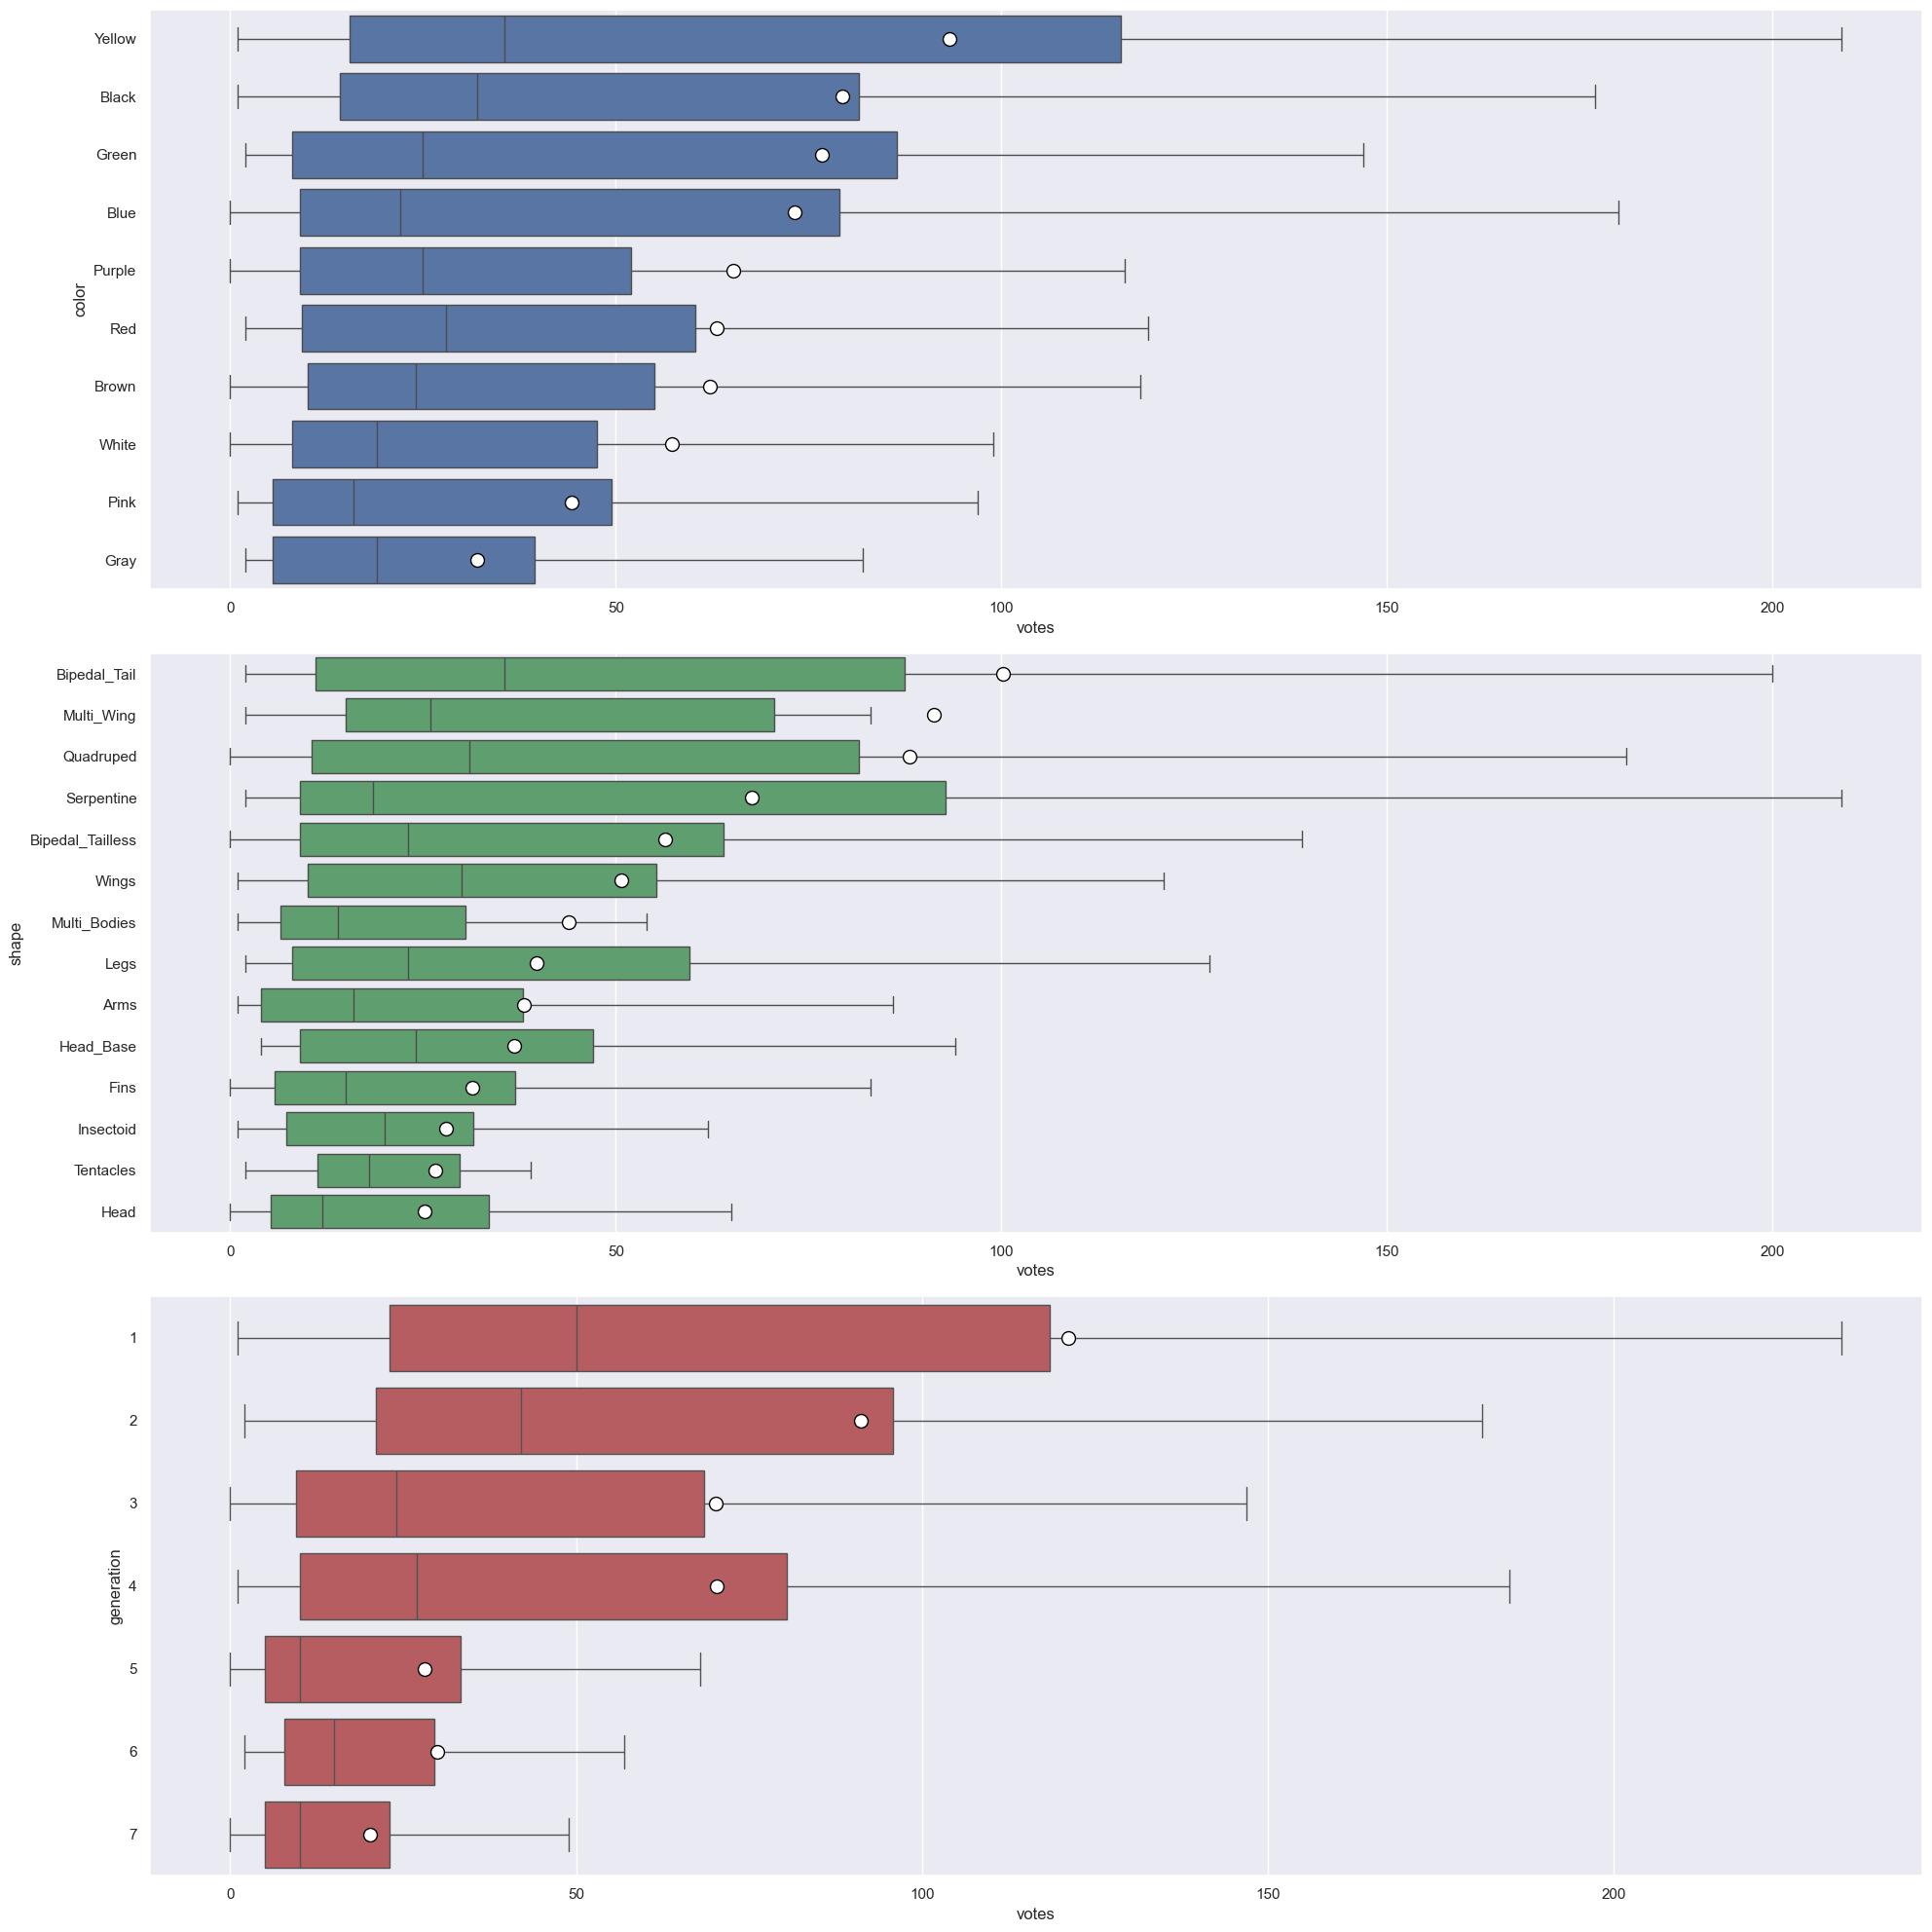

<Figure size 2000x2000 with 0 Axes>

In [141]:
# Three boxplots of the overall spread showing how popular they are by groups.
# We are removing the outliers so we can get a closer look at the spread.
df_box(poke, showfliers=False)

# Makes plots directory if it doesn't exist and then save the plot as a png file
if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig('plots/poke_boxplot_no_fliers.png')

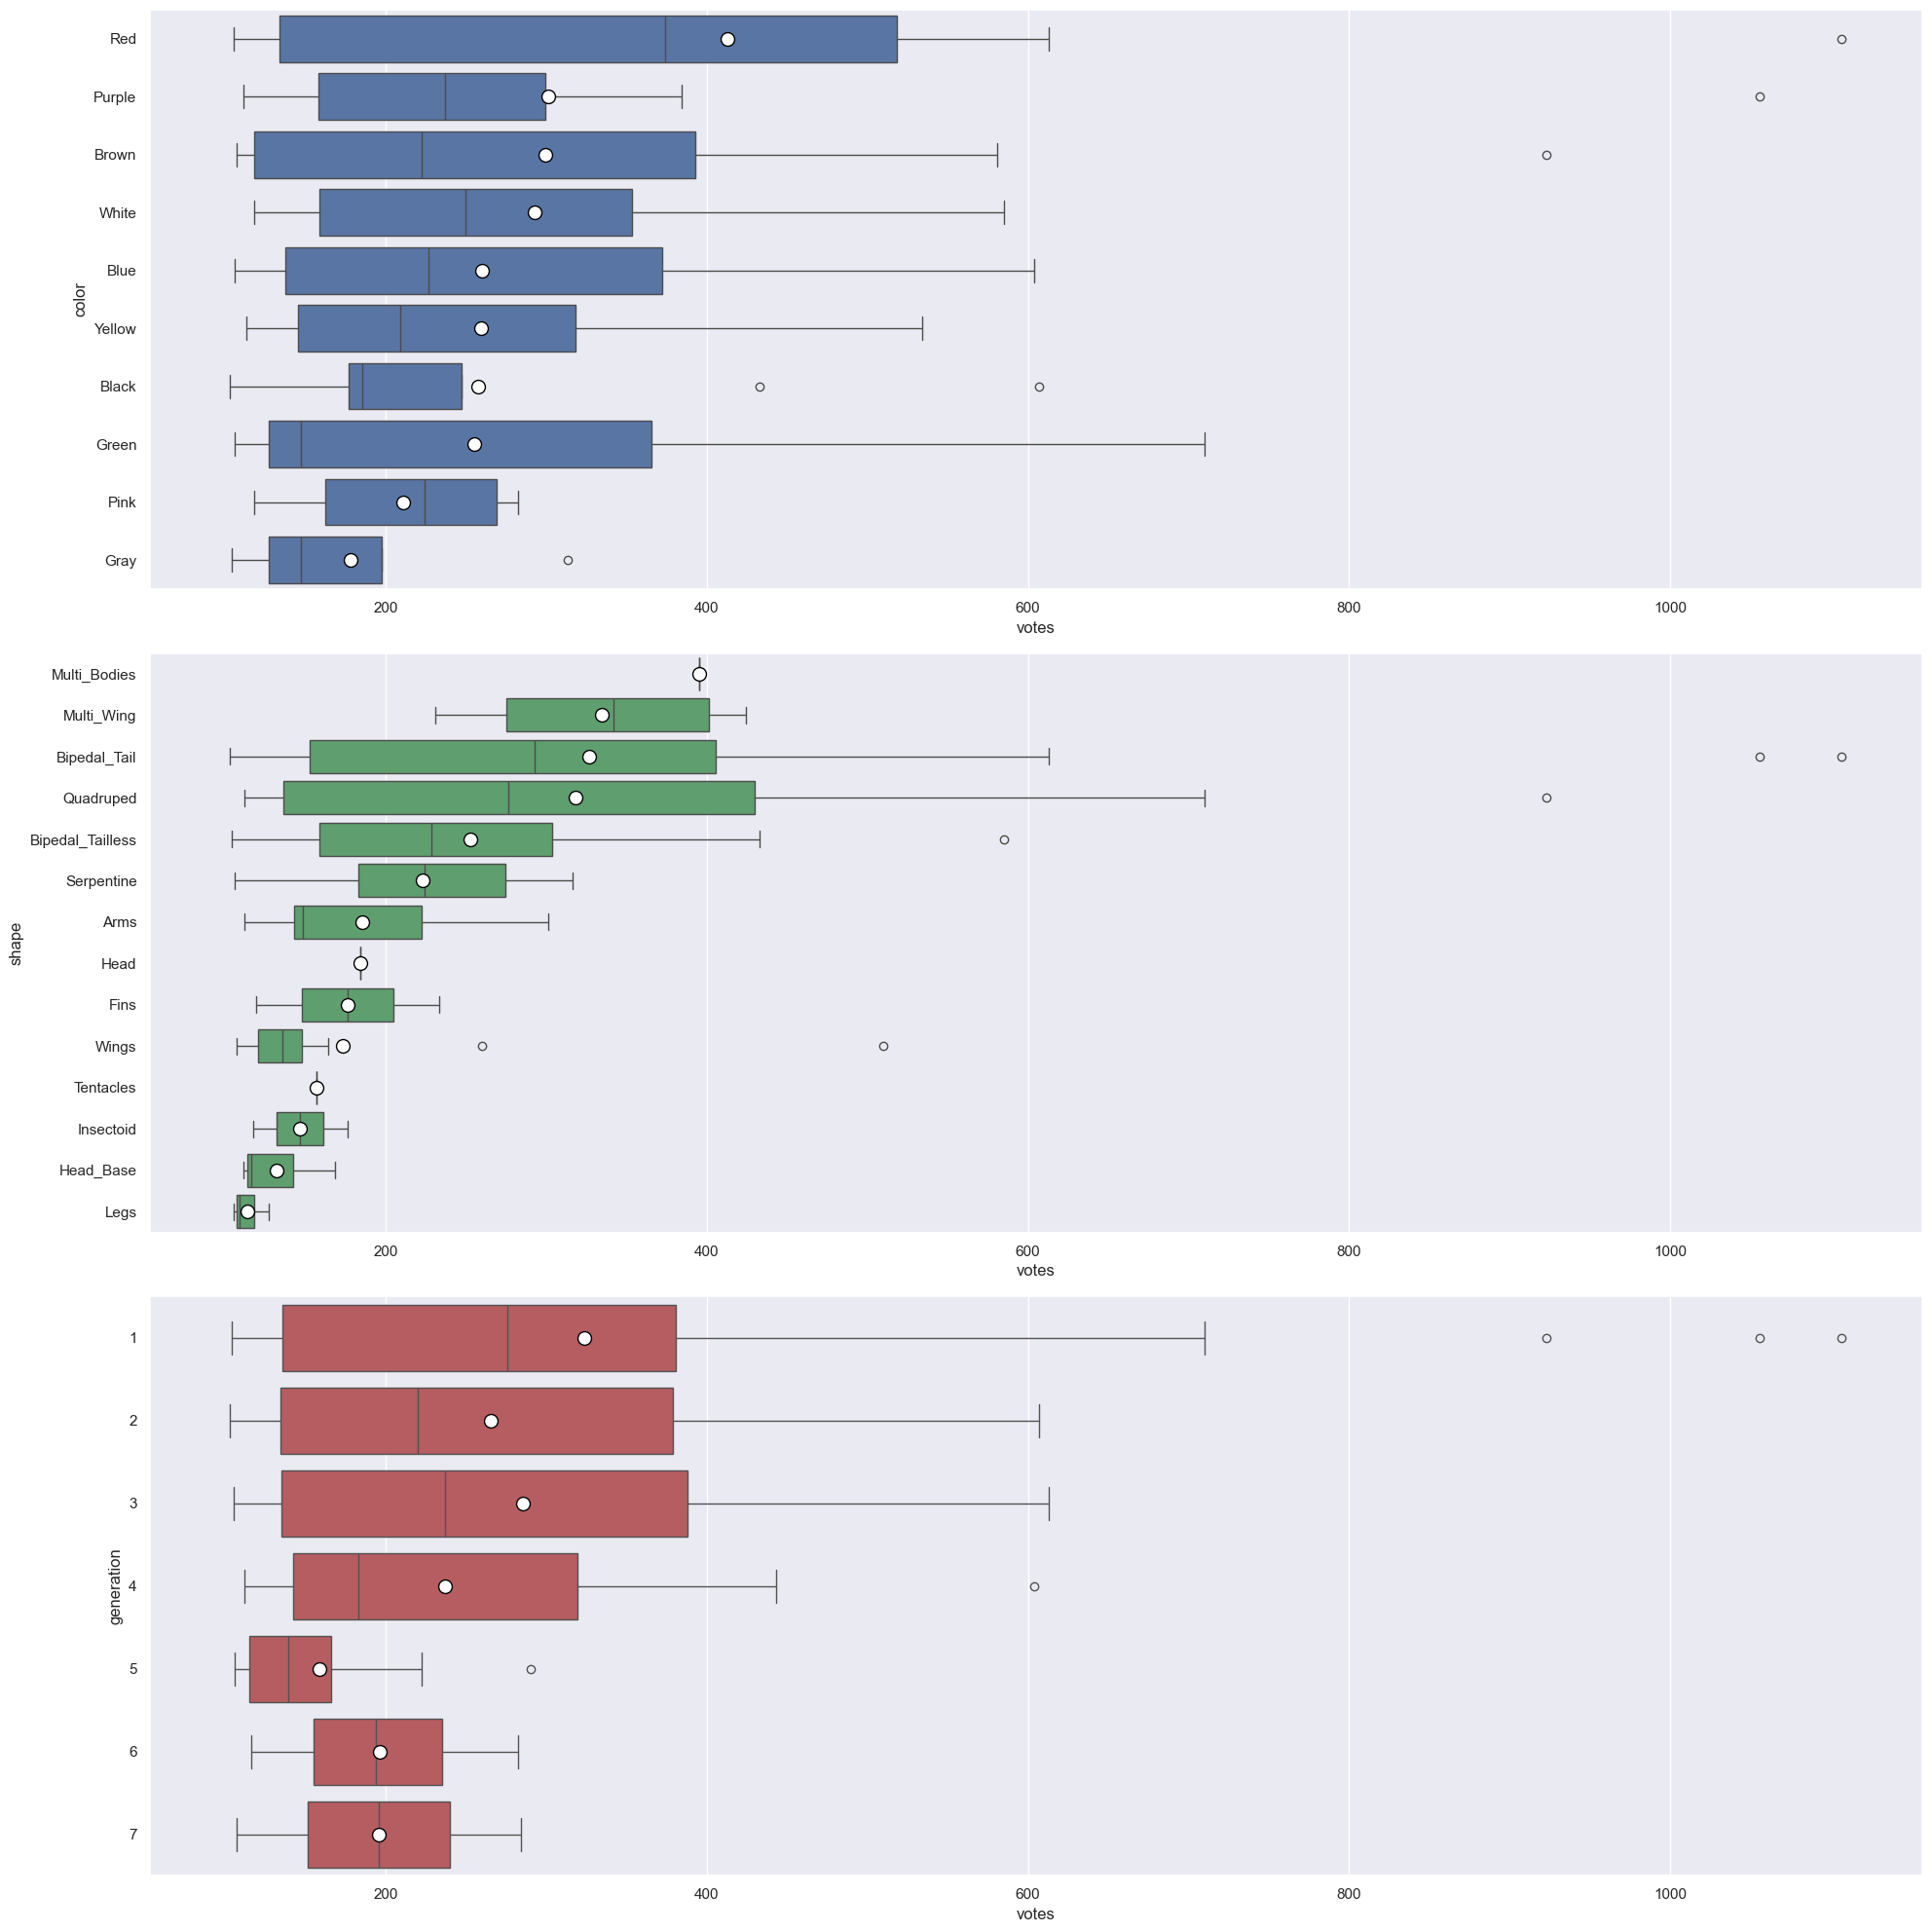

<Figure size 2000x2000 with 0 Axes>

In [142]:
# Three boxplots of the overall spread showing only pokemon that recived 100 or more votes.
df_box(poke_over)

# Makes plots directory if it doesn't exist and then save the plot as a png file
if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig('plots/poke_over_boxplot.png')

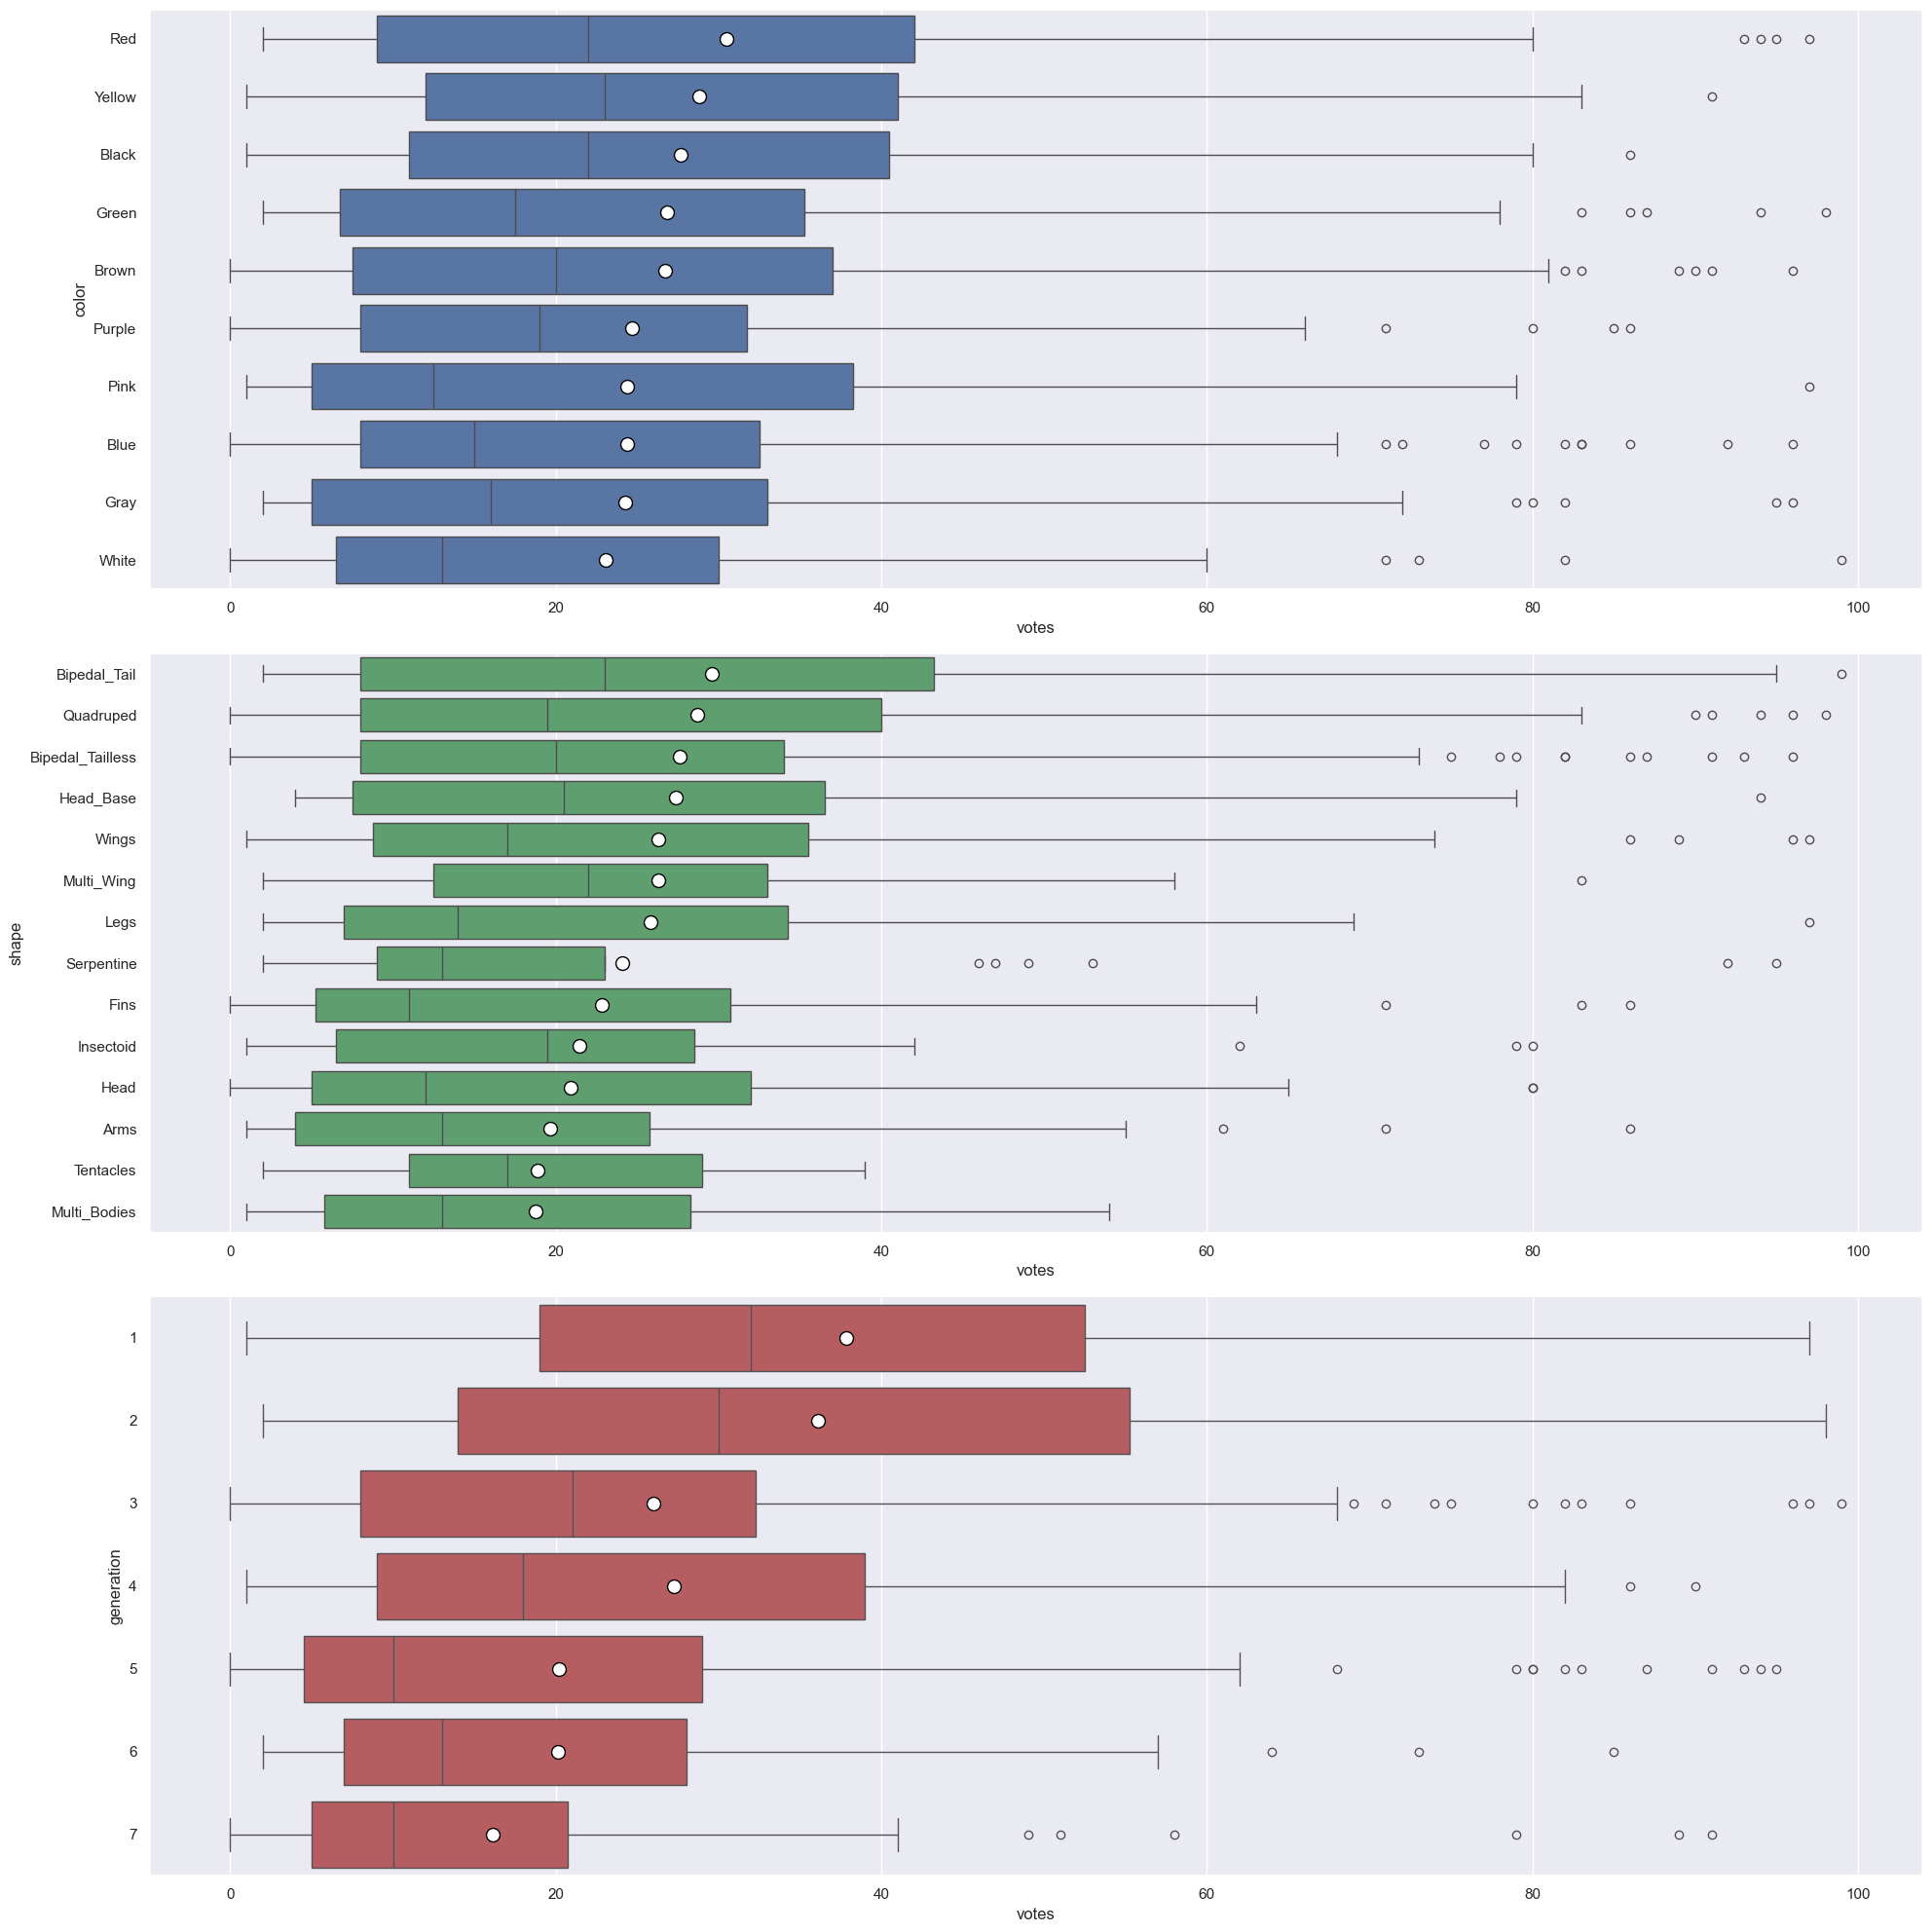

<Figure size 2000x2000 with 0 Axes>

In [143]:
# Three boxplots of the overall spread showing only pokemon that recived 99 or less votes.
df_box(poke_under)

# Makes plots directory if it doesn't exist and then save the plot as a png file
if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig('plots/poke_under_boxplot.png')